In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
import seaborn as sns

In [47]:
import kagglehub

In [48]:
path = kagglehub.dataset_download("krupadharamshi/bostonhousing")

print("Path to dataset files:", path)

Path to dataset files: /home/mbpaiva/.cache/kagglehub/datasets/krupadharamshi/bostonhousing/versions/1


In [49]:
import os
import kagglehub

# path = kagglehub.dataset_download("joebeachcapital/medical-insurance-costs")
# path = kagglehub.dataset_download("labledata/real-estate-price-prediction")
# path = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")
# path = kagglehub.dataset_download("yasserh/wine-quality-dataset")
# path = kagglehub.dataset_download("yasserh/auto-mpg-dataset")

path = kagglehub.dataset_download("krupadharamshi/bostonhousing")
file_path = os.path.join(path, os.listdir(path)[0])

print(file_path)

/home/mbpaiva/.cache/kagglehub/datasets/krupadharamshi/bostonhousing/versions/1/BostonHousing.csv


In [50]:
# mtcars = pd.read_csv('mtcars.csv')

bostonhousing = pd.read_csv(file_path)

In [51]:
# mtcars.head()

bostonhousing.head()
dataset = bostonhousing

In [52]:
# mtcars = mtcars.drop(['model'], axis=1)
# mtcars.shape

dataset.shape

(506, 14)

In [53]:
# bostonhousing.iloc[:,0].min()
# bostonhousing.min(axis=1)

In [54]:
def plot_correlation_matrix(dataset):
    corr = dataset.corr()
    sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.1f')

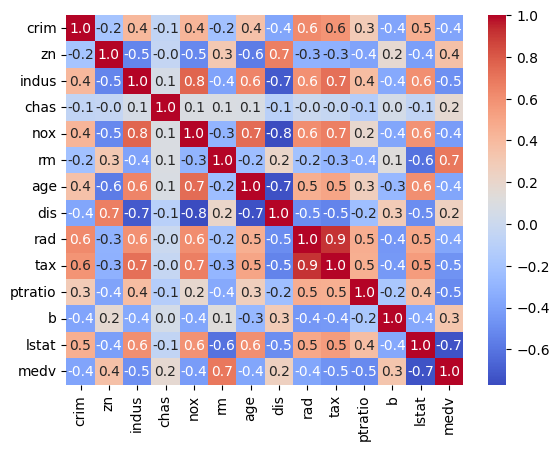

In [55]:
plot_correlation_matrix(dataset)

In [56]:
def get_list_of_tuples(x, dataset) -> list:
    tuples_list = []
    for feature in dataset.columns:
        if feature != x:
            tuples_list.append((x,feature))
    return tuples_list
        

In [57]:
def get_scatter_plot_analysis(x, dataset) -> None:
    column_pairs = get_list_of_tuples(x, dataset)
    n_plots = len(column_pairs)
    fig, axes = plt.subplots(nrows=n_plots, ncols=1, figsize=(6,4 * n_plots))

    for i, pair in enumerate(column_pairs):
        x_col, y_col = pair

        if n_plots > 1:
            sns.scatterplot(x=x_col, y=y_col, data=dataset, ax=axes[i])
            axes[i].set_title(f'{x_col} vs {y_col}')
        else:
            sns.scatterplot(x=x_col, y=y_col, data=dataset, ax=axes)
            axes.set_title(f'{x_col} vs {y_col}')

    plt.tight_layout()

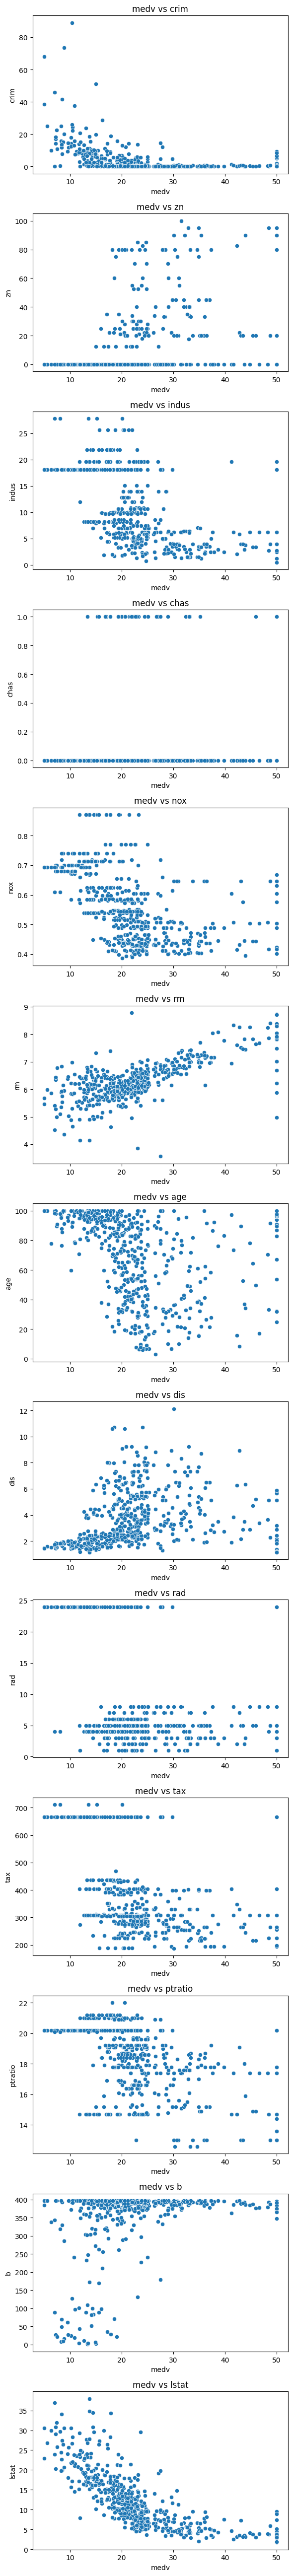

In [72]:
x = 'medv'
get_scatter_plot_analysis(x, dataset)

In [69]:
model = sm.ols(formula='medv ~ rm + lstat', data=dataset)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Mon, 08 Dec 2025   Prob (F-statistic):          7.01e-112
Time:                        09:39:58   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.6

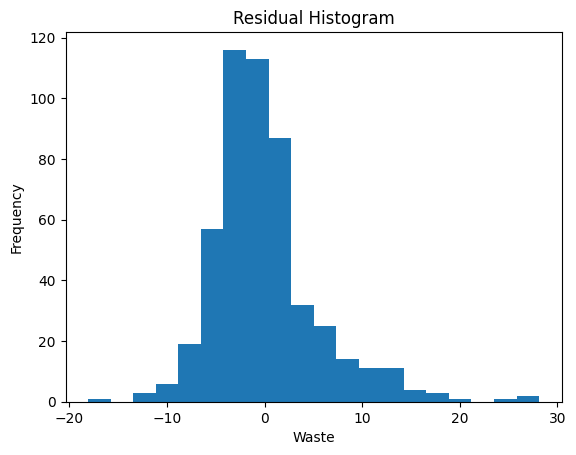

In [70]:
resids = model.resid

plt.hist(resids, bins=20)
plt.xlabel('Waste')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()

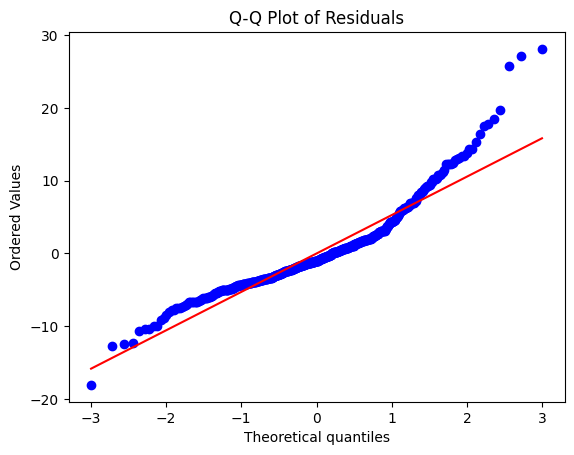

In [71]:
stats.probplot(resids, dist='norm', plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()